In [1]:
from google.colab import auth
auth.authenticate_user()

In [2]:
import csv
import os, sys
import glob
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# 打开矢量
csv_origin_dir = r"/content/drive/MyDrive/原始样本点NDVI时间序列"
os.chdir(csv_origin_dir)
CSV_list = glob.glob("*.csv")
print(CSV_list)
NDVI = []
i = 0
print(CSV_list[i])
with open(os.path.join(csv_origin_dir, CSV_list[i]), encoding='utf-8-sig') as f :
  for row in csv.reader(f, skipinitialspace=True):
    NDVI.append(row)
n = np.array(NDVI).shape[0]
print(NDVI)
dataSet = []
for i in range(1, n):
  a = list(map(float, NDVI[i][1:20]))
  dataSet.append(a)
band = range(len(NDVI[0][1:20]))
print(band)
# for i in range(1, n-1):
# plt.plot(band, dataSet[i], 'b-')

['forest.csv', 'wheat.csv', 'corn.csv', 'other.csv', 'cotton.csv']
forest.csv
[['system:index', 'NDVI00', 'NDVI01', 'NDVI02', 'NDVI03', 'NDVI04', 'NDVI05', 'NDVI06', 'NDVI07', 'NDVI08', 'NDVI09', 'NDVI10', 'NDVI11', 'NDVI12', 'NDVI13', 'NDVI14', 'NDVI15', 'NDVI16', 'NDVI17', 'NDVI18', 'NDVI19', '_样点_', 'class', 'system_ind', '备注', '常年耕_', '纬度', '经度', '.geo'], ['00000000000000000000_0', '0.22485021', '0.16299559', '0.13864578', '0.17300862', '0.24064769', '0.68914694', '0.6932153', '0.66533864', '0.63783664', '0.6637681', '0.7717391', '0.86603993', '0.90017825', '0.79469204', '0.6651481', '0.60876787', '0.53203607', '0.27651748', '0.32607785', '0.26920506', 'XH-16', 'Nut', '00000000000000000032', '', '', '41.569842', '82.589739', '{"type":"MultiPoint","coordinates":[]}'], ['00000000000000000001_0', '0.26046386', '0.17970401', '0.15170279', '0.17479074', '0.26420736', '0.5798239', '0.71492004', '0.64547294', '0.87104386', '0.78900385', '0.888', '0.89863235', '0.8784029', '0.7682525', '0.

In [19]:
from sklearn.cluster import KMeans
import joblib
import numpy
import time
import matplotlib.pyplot as plt
from google.colab import files

estimator = KMeans(n_clusters=4)#构造聚类器
estimator.fit(dataSet)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

result = estimator.fit_predict(dataSet)

print("Predicting result: ", result)
# print(len(dataSet))
numSamples = len(dataSet)
# print(centroids,type(centroids)) #显示中心点
# print(estimator.inertia_) #显示聚类效果
mark = ['-r', '-b', '-g', '-k', '^r', '+r', 'sr', 'dr', '<r', 'pr']

Predicting result:  [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 3 2 2 0 2 3 0 0 1 2 1 3 0 2 0
 0 1 0 0 2 0 2 0 2 1 3 0 0 1 0 2 1 2 1 0 0 0 0 0 1 1 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Orchard')

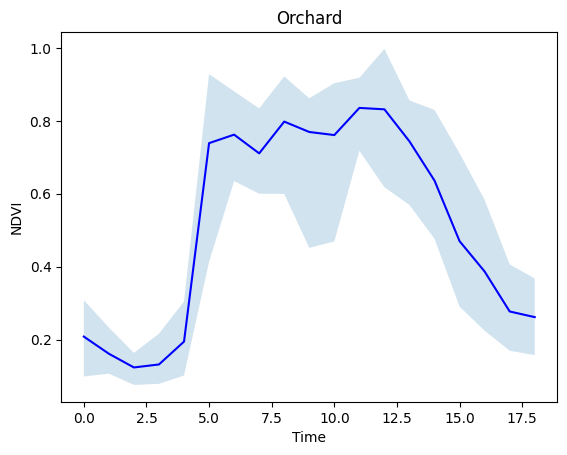

In [20]:
i = 0
a = 0
fig, ax = plt.subplots()
orchard_band = band
orchard_centroids = centroids[i]
orchard_class_data = []
for j in range(1, len(result)):
  if result[j] == i:
    a = a+1
    orchard_class_data.append(dataSet[j])
plt.plot(orchard_band, orchard_centroids, '-b')

orchard_class_data = np.array(orchard_class_data)

orchard_class_data_max = []
for j in range(len(band)):
  max = orchard_class_data[:,j].max()
  orchard_class_data_max.append(max)

orchard_class_data_min = []
for j in range(len(band)):
  min = orchard_class_data[:,j].min()
  orchard_class_data_min.append(min)

ax.fill_between(band, orchard_class_data_min, orchard_class_data_max, alpha=0.2)
ax.set_xlabel('Time')
ax.set_ylabel('NDVI')
ax.set_title('Orchard')

# plt.savefig('Fruit Forest model 2.svg',format='svg')
# files.download('Fruit Forest model 2.svg')  

Text(0.5, 1.0, 'Orchard')

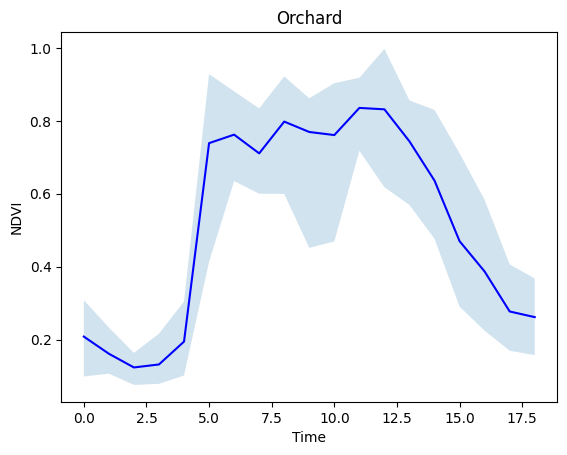

In [7]:
i = 1
a = 0
fig, ax = plt.subplots()
orchard_band = band
orchard_centroids = centroids[i]
orchard_class_data = []
for j in range(1, len(result)):
  if result[j] == i:
    a = a+1
    orchard_class_data.append(dataSet[j])
plt.plot(orchard_band, orchard_centroids, '-b')

class_data = np.array(orchard_class_data)
len(class_data)
orchard_class_data_max = []
for i in range(len(band)):
  max = class_data[:,i].max()
  orchard_class_data_max.append(max)

orchard_class_data_min = []
for i in range(len(band)):
  min = class_data[:,i].min()
  orchard_class_data_min.append(min)

ax.fill_between(band, orchard_class_data_min, orchard_class_data_max, alpha=0.2)
ax.set_xlabel('Time')
ax.set_ylabel('NDVI')
ax.set_title('Orchard')

# plt.savefig('Fruit Forest model 2.svg',format='svg')
# files.download('Fruit Forest model 2.svg') 

Text(0.5, 1.0, 'Orchard')

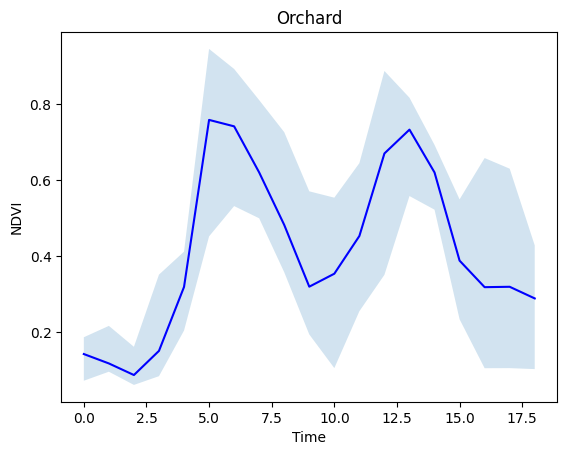

In [8]:
i = 2
a = 0
fig, ax = plt.subplots()
orchard_band = band
orchard_centroids = centroids[i]
orchard_class_data = []
for j in range(1, len(result)):
  if result[j] == i:
    a = a+1
    orchard_class_data.append(dataSet[j])
plt.plot(orchard_band, orchard_centroids, '-b')

class_data = np.array(orchard_class_data)
len(class_data)
orchard_class_data_max = []
for i in range(len(band)):
  max = class_data[:,i].max()
  orchard_class_data_max.append(max)

orchard_class_data_min = []
for i in range(len(band)):
  min = class_data[:,i].min()
  orchard_class_data_min.append(min)

ax.fill_between(band, orchard_class_data_min, orchard_class_data_max, alpha=0.2)
ax.set_xlabel('Time')
ax.set_ylabel('NDVI')
ax.set_title('Orchard')

# plt.savefig('Fruit Forest model 2.svg',format='svg')
# files.download('Fruit Forest model 2.svg')  

Text(0.5, 1.0, 'Orchard')

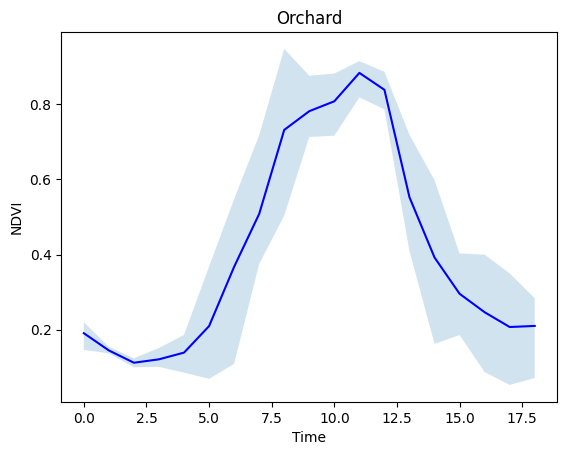

In [9]:
i = 3
a = 0
fig, ax = plt.subplots()
orchard_band = band
orchard_centroids = centroids[i]
orchard_class_data = []
for j in range(1, len(result)):
  if result[j] == i:
    a = a+1
    orchard_class_data.append(dataSet[j])
plt.plot(orchard_band, orchard_centroids, '-b')

class_data = np.array(orchard_class_data)
len(class_data)
orchard_class_data_max = []
for i in range(len(band)):
  max = class_data[:,i].max()
  orchard_class_data_max.append(max)

orchard_class_data_min = []
for i in range(len(band)):
  min = class_data[:,i].min()
  orchard_class_data_min.append(min)

ax.fill_between(band, orchard_class_data_min, orchard_class_data_max, alpha=0.2)
ax.set_xlabel('Time')
ax.set_ylabel('NDVI')
ax.set_title('Orchard')

# plt.savefig('Fruit Forest model 2.svg',format='svg')
# files.download('Fruit Forest model 2.svg') 

In [16]:
# 打开矢量
csv_origin_dir = r"/content/drive/MyDrive/原始样本点NDVI时间序列"
os.chdir(csv_origin_dir)
CSV_list = glob.glob("*.csv")
print(CSV_list)
NDVI = []
i = 1
print(CSV_list[i])
with open(os.path.join(csv_origin_dir, CSV_list[i]), encoding='utf-8-sig') as f :
  for row in csv.reader(f, skipinitialspace=True):
    NDVI.append(row)
n = np.array(NDVI).shape[0]
dataSet = []
for i in range(1, n):
  a = list(map(float, NDVI[i][1:20]))
  dataSet.append(a)
band = range(len(NDVI[0][1:20]))
print(band)
# for i in range(1, n-1):
# plt.plot(band, dataSet[i], 'b-')

from sklearn.cluster import KMeans
import joblib
import numpy
import time
import matplotlib.pyplot as plt

estimator = KMeans(n_clusters=4)#构造聚类器
estimator.fit(dataSet)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

result = estimator.fit_predict(dataSet)

print("Predicting result: ", result)
# print(len(dataSet))
numSamples = len(dataSet)
# print(centroids,type(centroids)) #显示中心点
# print(estimator.inertia_) #显示聚类效果
mark = ['-r', '-b', '-g', '-k', '^r', '+r', 'sr', 'dr', '<r', 'pr']

['forest.csv', 'wheat.csv', 'corn.csv', 'other.csv', 'cotton.csv']
wheat.csv
range(0, 19)
Predicting result:  [1 1 2 0 2 0 3 1 0 2 0 3 1 1 1 0 2 1 0 1 3 1 0 3 2 0 1 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'wheat')

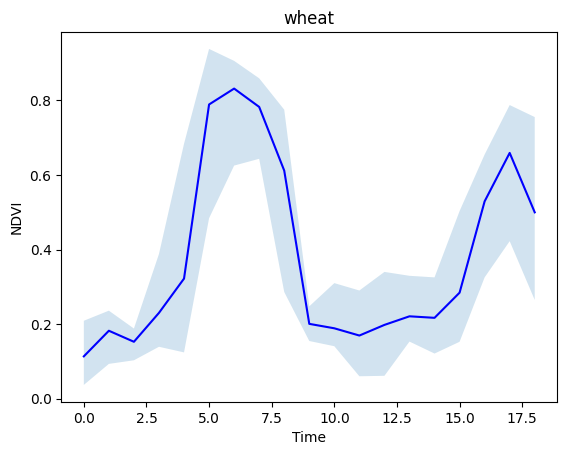

In [17]:
i = 0
a = 0
fig, ax = plt.subplots()
wheat_band = band
wheat_centroids = centroids[i]
wheat_class_data = []
for j in range(1, len(result)):
  if result[j] == i:
    a = a+1
    wheat_class_data.append(dataSet[j])
plt.plot(wheat_band, wheat_centroids, '-b')

wheat_class_data = np.array(wheat_class_data)

wheat_class_data_max = []
for j in range(len(band)):
  max = wheat_class_data[:,j].max()
  wheat_class_data_max.append(max)

wheat_class_data_min = []
for j in range(len(band)):
  min = wheat_class_data[:,j].min()
  wheat_class_data_min.append(min)

ax.fill_between(band, wheat_class_data_min, wheat_class_data_max, alpha=0.2)
ax.set_xlabel('Time')
ax.set_ylabel('NDVI')
ax.set_title('wheat')

# plt.savefig('Fruit Forest model 2.svg',format='svg')
# files.download('Fruit Forest model 2.svg')  

Text(0.5, 1.0, 'wheat')

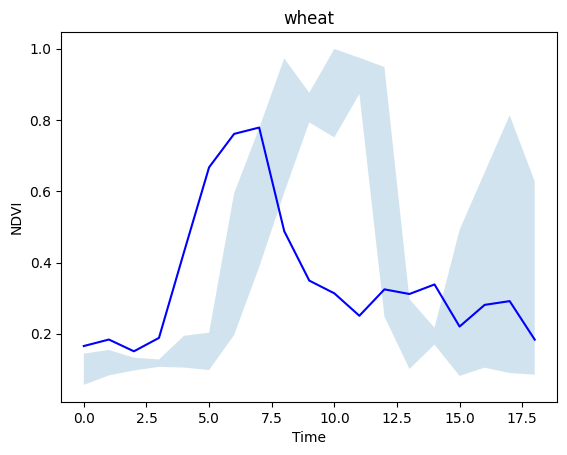

In [12]:
i = 1
a = 0
fig, ax = plt.subplots()
wheat_band = band
wheat_centroids = centroids[i]
wheat_class_data = []
for j in range(1, len(result)):
  if result[j] == i:
    a = a+1
    wheat_class_data.append(dataSet[j])
plt.plot(wheat_band, wheat_centroids, '-b')

wheat_class_data = np.array(wheat_class_data)

wheat_class_data_max = []
for j in range(len(band)):
  max = wheat_class_data[:,j].max()
  wheat_class_data_max.append(max)

wheat_class_data_min = []
for j in range(len(band)):
  min = wheat_class_data[:,j].min()
  wheat_class_data_min.append(min)

ax.fill_between(band, wheat_class_data_min, wheat_class_data_max, alpha=0.2)
ax.set_xlabel('Time')
ax.set_ylabel('NDVI')
ax.set_title('wheat')

# plt.savefig('Fruit Forest model 2.svg',format='svg')
# files.download('Fruit Forest model 2.svg')  

Text(0.5, 1.0, 'wheat')

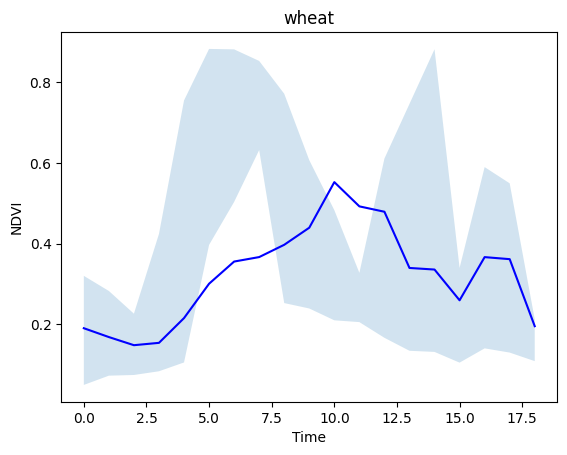

In [13]:
i = 2
a = 0
fig, ax = plt.subplots()
wheat_band = band
wheat_centroids = centroids[i]
wheat_class_data = []
for j in range(1, len(result)):
  if result[j] == i:
    a = a+1
    wheat_class_data.append(dataSet[j])
plt.plot(wheat_band, wheat_centroids, '-b')

wheat_class_data = np.array(wheat_class_data)

wheat_class_data_max = []
for j in range(len(band)):
  max = wheat_class_data[:,j].max()
  wheat_class_data_max.append(max)

wheat_class_data_min = []
for j in range(len(band)):
  min = wheat_class_data[:,j].min()
  wheat_class_data_min.append(min)

ax.fill_between(band, wheat_class_data_min, wheat_class_data_max, alpha=0.2)
ax.set_xlabel('Time')
ax.set_ylabel('NDVI')
ax.set_title('wheat')

# plt.savefig('Fruit Forest model 2.svg',format='svg')
# files.download('Fruit Forest model 2.svg')  

Text(0.5, 1.0, 'wheat')

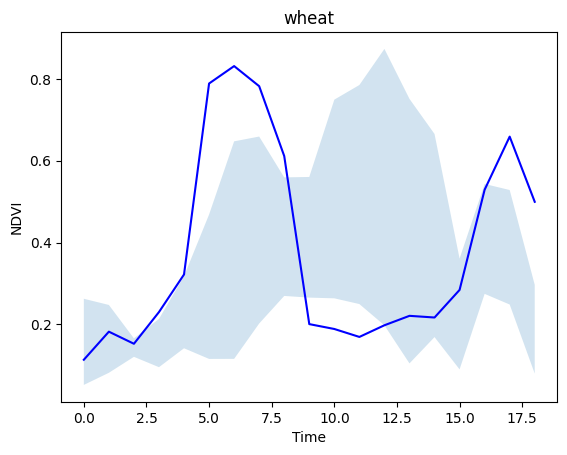

In [14]:
i = 3
a = 0
fig, ax = plt.subplots()
wheat_band = band
wheat_centroids = centroids[i]
wheat_class_data = []
for j in range(1, len(result)):
  if result[j] == i:
    a = a+1
    wheat_class_data.append(dataSet[j])
plt.plot(wheat_band, wheat_centroids, '-b')

wheat_class_data = np.array(wheat_class_data)

wheat_class_data_max = []
for j in range(len(band)):
  max = wheat_class_data[:,j].max()
  wheat_class_data_max.append(max)

wheat_class_data_min = []
for j in range(len(band)):
  min = wheat_class_data[:,j].min()
  wheat_class_data_min.append(min)

ax.fill_between(band, wheat_class_data_min, wheat_class_data_max, alpha=0.2)
ax.set_xlabel('Time')
ax.set_ylabel('NDVI')
ax.set_title('wheat')

# plt.savefig('Fruit Forest model 2.svg',format='svg')
# files.download('Fruit Forest model 2.svg')  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

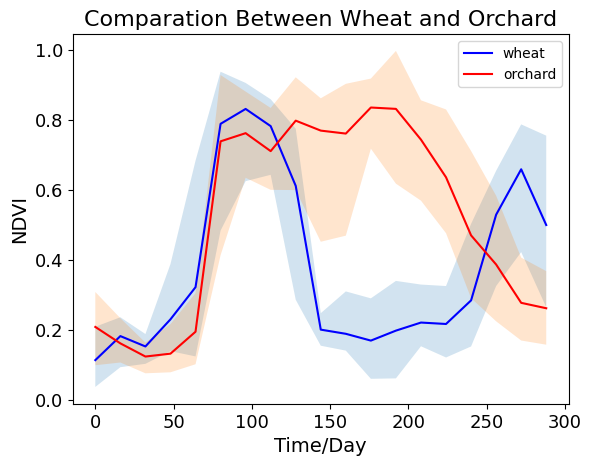

In [21]:
fig, ax = plt.subplots()
wheat_band = list(range(0,16*19,16))
orchard_band = list(range(0,16*19,16))
ax.plot(wheat_band, wheat_centroids, '-b', label='wheat')
ax.fill_between(wheat_band, wheat_class_data_min, wheat_class_data_max, alpha=0.2)
ax.plot(orchard_band, orchard_centroids, '-r', label='orchard')
ax.fill_between(orchard_band, orchard_class_data_min, orchard_class_data_max, alpha=0.2)
ax.set_xlabel('Time/Day',size=14)
ax.set_ylabel('NDVI',size=14)
ax.set_title('Comparation Between Wheat and Orchard',size=16)
ax.legend(loc=0,prop={'size':10})
ax.tick_params(axis='y',labelsize=13)
ax.tick_params(axis='x',labelsize=13)
fig.savefig('Comparation Between Wheat and Orchard.png',dpi=330,format='png',bbox_inches='tight')
files.download('Comparation Between Wheat and Orchard.png')  